
---

### 因子实战 第七集 
# 因子回测 Backtesting 系列：一个因子的诞生

### 🎬 主讲：大导演哈罗德
- 学历背景：香港中文大学本科学位 金融工程专业
- 下一步学业：即将前往美国深造金融工程硕士（已获得录取）
##### 🌐 [关注我的Bilibili，看所有人都能听得懂的量化学习内容](https://space.bilibili.com/629573485)
##### 🌐 [点击这里关注我的YouTube](https://www.youtube.com/@BD_Harold)

🌟🌟🌟 我有一个梦想，就是让量化变成不再是束之高阁的灵丹妙药，而是让散户投资者认识市场风险最好的工具 #哈罗德的量化频道 🌟🌟🌟

---

In [1]:
"""
我们先跳过这一个框框的代码，先看下一个框框的代码。
这个框框的代码是用来导入数据的和因子回测的方程的。
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from 因子回测包 import factor_correlation as FactorIC
from 因子回测包 import factor_group as FactorGroup

sw_ind = pd.read_pickle('数据/IndexComponent_SWN_I.txt')
stock_close = pd.read_pickle('数据/StockQuote_ClosePrice_BackwardAdj.txt')
stock_open = pd.read_pickle('数据/StockQuote_OpenPrice_BackwardAdj.txt')
monthly_trading_day = pd.read_pickle('数据/monthly_trading_day.pkl')
monthly_trading_day['start_date'] = pd.to_datetime(monthly_trading_day['start_date'], format='%Y%m%d')
monthly_trading_day['end_date'] = pd.to_datetime(monthly_trading_day['end_date'], format='%Y%m%d')
start_date = pd.to_datetime('20120101', format='%Y%m%d')
end_date = pd.to_datetime('20231231', format='%Y%m%d')
filtered_trading_days = monthly_trading_day.loc[(monthly_trading_day['end_date'] >= start_date) & (monthly_trading_day['end_date'] <= end_date)]
stock_close.index = pd.to_datetime(stock_close.index)
stock_open.index = pd.to_datetime(stock_open.index)
stock_ret_monthly = stock_close.reindex(index = filtered_trading_days.end_date).pct_change() 
stock_ret_monthly_nextopen = stock_open.shift(-1).reindex(filtered_trading_days.end_date).pct_change()

def simple_factor_test(factor,use_data = 'this_close'):
    if use_data=='this_close':
        this_ret_data = stock_ret_monthly.shift(-1)
    else: 
        this_ret_data = stock_ret_monthly_nextopen.shift(-1)
    ic,rankic = FactorIC(factor,this_ret_data)
    factor_group = FactorGroup(factor)
    condata = pd.concat([factor_group.unstack(),this_ret_data.unstack()],axis=1).dropna().reset_index()
    condata.columns =['stockcode','date','group_id','ret']
    group_ret = condata.groupby(['date','group_id'])['ret'].mean().unstack()
    return ic,rankic,group_ret

# 这个框框的代码是用来导入数据的和因子回测的方程的。
# 我们先跳过这一个框框的代码，先看下一个框框的代码。


# 包装的思维，我们先来看看因子回测的流程

## EP因子
EP因子代表的是盈利收益率，即每投入一元钱所能得到的盈利。它是市盈率（P/E）的倒数。市盈率是衡量公司当前股票价格相对于每股盈利的指标。因此，EP因子反映了投资者每投资一元所能得到的盈利。

## dEP因子
dEP因子是EP因子的60日差分，用来衡量60天内盈利收益率的变化。它能反映出盈利收益率的趋势，是量化分析中常用的一个信号。

在量化金融分析中，dEP因子可以用来发现投资策略的信号。正的dEP值可能表明盈利收益率在提高，这可能是一个看涨信号；负的dEP值可能表明盈利收益率在下降，可能是一个看跌信号。这类因子经常被包括在用于资产定价或投资组合构建的多因子模型中。



In [2]:
pe = pd.read_pickle('数据/StockQuote_PEttm.txt')
pe

000001.SZ  000002.SZ  000003.SZ  000004.SZ  000005.SZ  000006.SZ  \
19910703        NaN        NaN    26.3956        NaN        NaN        NaN   
19910704        NaN        NaN    23.0497        NaN        NaN        NaN   
19910705        NaN        NaN    26.0239        NaN        NaN        NaN   
19910708        NaN        NaN    25.4662        NaN        NaN        NaN   
19910710        NaN        NaN    22.3062        NaN        NaN        NaN   
...             ...        ...        ...        ...        ...        ...   
20231225     3.6777     6.4041        NaN        NaN        NaN    27.5205   
20231226     3.6417     6.3232        NaN        NaN        NaN    27.0856   
20231227     3.6497     6.3232        NaN        NaN        NaN    28.2660   
20231228     3.7818     6.5408        NaN        NaN        NaN    28.2660   
20231229     3.7578     6.5035        NaN        NaN        NaN    28.5145   

          000007.SZ  000008.SZ  000009.SZ  000010.SZ  ...  873570.BJ  \
19910703        NaN        NaN        NaN        NaN  ...        NaN   
19910704        NaN        NaN        NaN        NaN  ...        NaN   
19910705        NaN        NaN        NaN        NaN  ...        NaN   
19910708        NaN        NaN        NaN        NaN  ...        NaN   
19910710        NaN        NaN        NaN        NaN  ...        NaN   
...             ...        ...        ...        ...  ...        ...   
20231225   115.2904        NaN    23.7738        NaN  ...    30.4278   
20231226   114.3297        NaN    23.6100        NaN  ...    32.9288   
20231227   114.8100        NaN    23.8148        NaN  ...    34.4277   
20231228   116.9717        NaN    24.1014        NaN  ...    34.5728   
20231229   116.9717        NaN    24.0400        NaN  ...    35.6547   

          873576.BJ  873593.BJ  873665.BJ  873679.BJ  873693.BJ  873703.BJ  \
19910703        NaN        NaN        NaN        NaN        NaN        NaN   
19910704        NaN        NaN        NaN        NaN        NaN        NaN   
19910705        NaN        NaN        NaN        NaN        NaN        NaN   
19910708        NaN        NaN        NaN        NaN        NaN        NaN   
19910710        NaN        NaN        NaN        NaN        NaN        NaN   
...             ...        ...        ...        ...        ...        ...   
20231225    28.9206    45.0626    20.5434    20.6684   103.6429    15.2196   
20231226    28.5608    43.7311    20.9607    20.6773    98.7415    15.5923   
20231227    29.7643    42.2734    20.5054    20.5339   100.7401    16.0228   
20231228    30.1489    42.4456    21.9660    20.6773    98.7415    16.0146   
20231229    32.6427    44.0755    23.1421    21.0539    98.8367    15.9318   

          873726.BJ  873833.BJ  T00018.SH  
19910703        NaN        NaN        NaN  
19910704        NaN        NaN        NaN  
19910705        NaN        NaN        NaN  
19910708        NaN        NaN        NaN  
19910710        NaN        NaN        NaN  
...             ...        ...        ...  
20231225    21.0074    21.2969        NaN  
20231226    21.7679    21.1019        NaN  
20231227    22.5008    21.4919        NaN  
20231228    21.7073    22.2268        NaN  
20231229    24.0494    22.5867        NaN  

[7972 rows x 5543 columns]

In [3]:
ep = 1/pe
ep.replace(np.inf, np.nan, inplace = True) #  计算EPttm并去除无限大的值
ep.replace(-np.inf, np.nan, inplace = True) #  计算EPttm并去除无限大的值
dEP = ep.diff(60) # dEP因子是EP因子的六十日delta
dEP

000001.SZ  000002.SZ  000003.SZ  000004.SZ  000005.SZ  000006.SZ  \
19910703        NaN        NaN        NaN        NaN        NaN        NaN   
19910704        NaN        NaN        NaN        NaN        NaN        NaN   
19910705        NaN        NaN        NaN        NaN        NaN        NaN   
19910708        NaN        NaN        NaN        NaN        NaN        NaN   
19910710        NaN        NaN        NaN        NaN        NaN        NaN   
...             ...        ...        ...        ...        ...        ...   
20231225   0.043437   0.017033        NaN        NaN        NaN   0.001129   
20231226   0.046333   0.016360        NaN        NaN        NaN   0.001384   
20231227   0.044274   0.013092        NaN        NaN        NaN  -0.000749   
20231228   0.027114   0.004666        NaN        NaN        NaN  -0.000749   
20231229   0.028803   0.008084        NaN        NaN        NaN  -0.000717   

          000007.SZ  000008.SZ  000009.SZ  000010.SZ  ...  873570.BJ  \
19910703        NaN        NaN        NaN        NaN  ...        NaN   
19910704        NaN        NaN        NaN        NaN  ...        NaN   
19910705        NaN        NaN        NaN        NaN  ...        NaN   
19910708        NaN        NaN        NaN        NaN  ...        NaN   
19910710        NaN        NaN        NaN        NaN  ...        NaN   
...             ...        ...        ...        ...  ...        ...   
20231225  -0.001517        NaN  -0.004096        NaN  ...        NaN   
20231226  -0.000954        NaN  -0.003849        NaN  ...        NaN   
20231227  -0.001089        NaN  -0.004759        NaN  ...        NaN   
20231228  -0.001132        NaN  -0.006583        NaN  ...        NaN   
20231229  -0.001642        NaN  -0.004923        NaN  ...        NaN   

          873576.BJ  873593.BJ  873665.BJ  873679.BJ  873693.BJ  873703.BJ  \
19910703        NaN        NaN        NaN        NaN        NaN        NaN   
19910704        NaN        NaN        NaN        NaN        NaN        NaN   
19910705        NaN        NaN        NaN        NaN        NaN        NaN   
19910708        NaN        NaN        NaN        NaN        NaN        NaN   
19910710        NaN        NaN        NaN        NaN        NaN        NaN   
...             ...        ...        ...        ...        ...        ...   
20231225  -0.015909  -0.010865  -0.042533        NaN        NaN        NaN   
20231226  -0.015474  -0.010601  -0.043996        NaN        NaN        NaN   
20231227  -0.018160  -0.012258  -0.044454        NaN        NaN        NaN   
20231228  -0.018459  -0.013525  -0.048912        NaN        NaN        NaN   
20231229  -0.021297  -0.017148  -0.052292        NaN        NaN        NaN   

          873726.BJ  873833.BJ  T00018.SH  
19910703        NaN        NaN        NaN  
19910704        NaN        NaN        NaN  
19910705        NaN        NaN        NaN  
19910708        NaN        NaN        NaN  
19910710        NaN        NaN        NaN  
...             ...        ...        ...  
20231225        NaN        NaN        NaN  
20231226        NaN        NaN        NaN  
20231227        NaN        NaN        NaN  
20231228  -0.029005        NaN        NaN  
20231229  -0.039180        NaN        NaN  

[7972 rows x 5543 columns]

In [5]:
# 回测周期：2012-01-01至2023-12-31
# change index into datetime
dEP.index = pd.to_datetime(dEP.index)
dEP_monthly = dEP.reindex(index = filtered_trading_days.end_date) # 按月抽样得到dEP的因子值
dEP_monthly


000001.SZ  000002.SZ  000003.SZ  000004.SZ  000005.SZ  000006.SZ  \
end_date                                                                       
2012-01-31   0.002481   0.002968        NaN  -0.005549  -0.000836   0.003023   
2012-02-29  -0.008819  -0.014278        NaN   0.000517   0.000000  -0.048998   
2012-03-30   0.009866   0.011612        NaN  -0.000039   0.000000  -0.075154   
2012-04-27   0.024902   0.009117        NaN   0.000090  -0.011260  -0.026038   
2012-05-31   0.035999   0.013286        NaN   0.000321  -0.011072  -0.006224   
...               ...        ...        ...        ...        ...        ...   
2023-07-31   0.000320  -0.006076        NaN        NaN        NaN  -0.005207   
2023-08-31   0.011596  -0.010884        NaN        NaN        NaN  -0.030556   
2023-09-28   0.016771   0.002706        NaN        NaN        NaN  -0.021728   
2023-10-31   0.028188   0.009378        NaN        NaN        NaN  -0.012639   
2023-11-30   0.033949   0.014017        NaN        NaN        NaN   0.002268   

            000007.SZ  000008.SZ  000009.SZ  000010.SZ  ...  873570.BJ  \
end_date                                                ...              
2012-01-31   0.001183   0.000250   0.003496   0.000000  ...        NaN   
2012-02-29  -0.006231   0.000168   0.006528   0.000000  ...        NaN   
2012-03-30  -0.010442        NaN   0.002593   0.000081  ...        NaN   
2012-04-27  -0.008362        NaN  -0.005099   0.003222  ...        NaN   
2012-05-31  -0.000973        NaN  -0.006213   0.003018  ...        NaN   
...               ...        ...        ...        ...  ...        ...   
2023-07-31        NaN        NaN  -0.001222        NaN  ...        NaN   
2023-08-31        NaN        NaN   0.005729        NaN  ...        NaN   
2023-09-28        NaN        NaN   0.004374        NaN  ...        NaN   
2023-10-31        NaN        NaN   0.002719        NaN  ...        NaN   
2023-11-30  -0.002407        NaN  -0.004027        NaN  ...        NaN   

            873576.BJ  873593.BJ  873665.BJ  873679.BJ  873693.BJ  873703.BJ  \
end_date                                                                       
2012-01-31        NaN        NaN        NaN        NaN        NaN        NaN   
2012-02-29        NaN        NaN        NaN        NaN        NaN        NaN   
2012-03-30        NaN        NaN        NaN        NaN        NaN        NaN   
2012-04-27        NaN        NaN        NaN        NaN        NaN        NaN   
2012-05-31        NaN        NaN        NaN        NaN        NaN        NaN   
...               ...        ...        ...        ...        ...        ...   
2023-07-31        NaN  -0.002515        NaN        NaN        NaN        NaN   
2023-08-31        NaN   0.009349        NaN        NaN        NaN        NaN   
2023-09-28   0.011647   0.005304        NaN        NaN        NaN        NaN   
2023-10-31   0.012465   0.004526        NaN        NaN        NaN        NaN   
2023-11-30  -0.006952  -0.008262        NaN        NaN        NaN        NaN   

            873726.BJ  873833.BJ  T00018.SH  
end_date                                     
2012-01-31        NaN        NaN        NaN  
2012-02-29        NaN        NaN        NaN  
2012-03-30        NaN        NaN        NaN  
2012-04-27        NaN        NaN        NaN  
2012-05-31        NaN        NaN        NaN  
...               ...        ...        ...  
2023-07-31        NaN        NaN        NaN  
2023-08-31        NaN        NaN        NaN  
2023-09-28        NaN        NaN        NaN  
2023-10-31        NaN        NaN        NaN  
2023-11-30        NaN        NaN        NaN  

[143 rows x 5543 columns]

In [6]:
ic,rankic,group_ret  = simple_factor_test(dEP_monthly)

<!-- dEP因子的平均IC：
平均 RankIC为： -->
多空组合的年化收益为：

In [7]:
group_ret['long_short_returns'] = group_ret[group_ret.columns[4]] - group_ret[group_ret.columns[0]]

avg_return = group_ret['long_short_returns'].mean()
std_deviation = group_ret['long_short_returns'].std()

avg_return_annualized = avg_return * 12  # Assuming monthly returns
std_deviation_annualized = std_deviation * np.sqrt(12)  # Assuming monthly returns

# Sharpe Ratio calculation (assuming the risk-free rate is 0 for simplicity)
sharpe_ratio = avg_return_annualized / std_deviation_annualized

# For Drawdown, calculate the cumulative return first
group_ret['cumulative_returns'] = (1 + group_ret['long_short_returns']).cumprod() - 1

# Then calculate the running maximum
group_ret['running_max'] = group_ret['cumulative_returns'].cummax()

# Now the drawdown can be calculated as the difference between the running max and the cumulative returns
group_ret['drawdown'] = group_ret['running_max'] - group_ret['cumulative_returns']
max_drawdown = group_ret['drawdown'].max()

# Output the results
print(f"Sharpe Ratio: {sharpe_ratio}")
print(f"Maximum Drawdown: {max_drawdown}")


Sharpe Ratio: 1.4645353104693195
Maximum Drawdown: 0.5535240868845799


In [8]:
#保留前六列
group_ret = group_ret.iloc[:,:5]
group_ret

group_id         0.0       1.0       2.0       3.0       4.0
date                                                        
2012-01-31  0.113908  0.120875  0.132476  0.134016  0.143463
2012-02-29 -0.082298 -0.077592 -0.073106 -0.064780 -0.064641
2012-03-30  0.078302  0.068039  0.077459  0.060621  0.054732
2012-04-27  0.017120  0.018830  0.020444  0.032158  0.043217
2012-05-31 -0.082906 -0.057036 -0.046106 -0.036698 -0.052190
...              ...       ...       ...       ...       ...
2023-06-30  0.000839 -0.012075 -0.006102  0.002027  0.031755
2023-07-31 -0.044249 -0.036021 -0.038696 -0.041185 -0.051512
2023-08-31 -0.003965 -0.003497 -0.006606  0.000582  0.001199
2023-09-28 -0.009297 -0.001650 -0.010443 -0.024162 -0.039430
2023-10-31  0.058947  0.061215  0.053519  0.051959  0.047796

[142 rows x 5 columns]

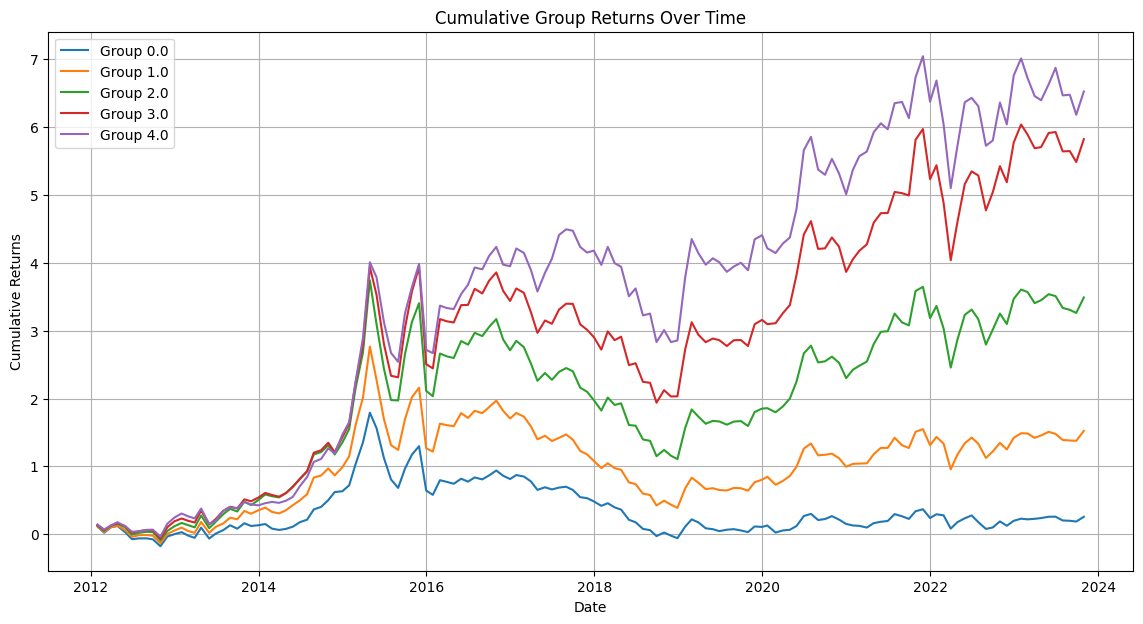

In [9]:
cumulative_returns = (1 + group_ret).cumprod() - 1

plt.figure(figsize=(14, 7))
for column in cumulative_returns.columns:
    plt.plot(cumulative_returns.index, cumulative_returns[column], label=f'Group {column}')

plt.title('Cumulative Group Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
# 计算年化收益率
annualized_returns = cumulative_returns.iloc[-1] ** (12 / len(cumulative_returns)) - 1
annualized_returns

group_id
0.0   -0.108621
1.0    0.036175
2.0    0.111412
3.0    0.160553
4.0    0.171782
Name: 2023-10-31 00:00:00, dtype: float64